No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


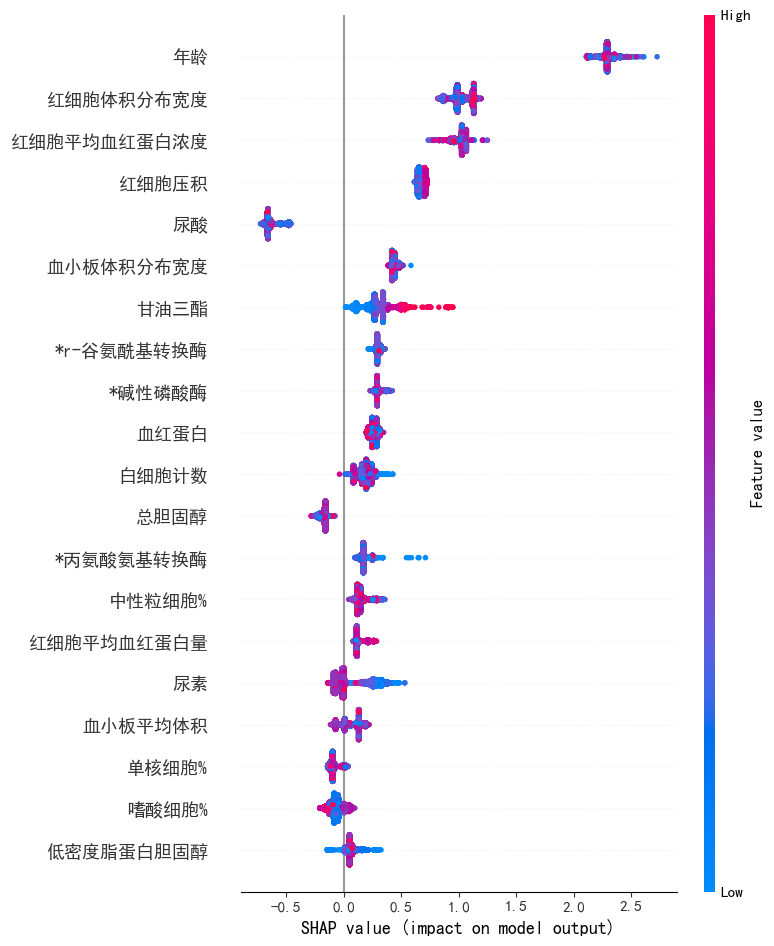

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import xgboost
import numpy as np
import pylab as plt
plt.rc('font', family = 'SimHei', size = 8)
plt.rc('axes', unicode_minus = False)
data_ = pd.read_excel('高斯混合模型.xlsx', index_col=0)
#x, y
y = data_['血糖']
x = data_.drop(labels=['血糖'], axis = 1)


xgb_reg = xgboost.train({"max_depth": 5}, xgboost.DMatrix(StandardScaler().fit_transform(x), label=y), 100)
import shap
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(x)  # 传入特征矩阵X，计算SHAP值
shap.summary_plot(shap_values, x, show=False)
plt.savefig('shap.png', dpi = 500)

In [1]:
import pandas as pd
data = pd.read_excel('结果4.xlsx', index_col=0)

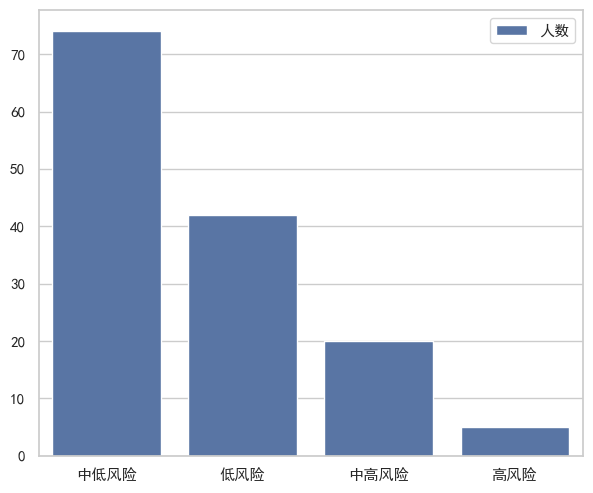

In [13]:

import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rc('font', family = 'SimHei', size = 9)
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(6, 5))
sns.barplot(x = ['中低风险', '低风险', '中高风险', '高风险'], y =  data['糖尿病风险'].value_counts().values, color='b', label = '人数')
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.tight_layout()
plt.savefig('bar.png', dpi = 500)

In [4]:
def pie(values, index, explode):
    #此代码大体参照matplotlib的一个example，使饼图变得更加美观
    wedges, texts = plt.pie(values, wedgeprops=dict(width=0.5), startangle=-40)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(index[i], xy=(x, y), xytext=(1.3*np.sign(x) * explode[i], 1.2 * y * explode[i]),
                        horizontalalignment=horizontalalignment, **kw)

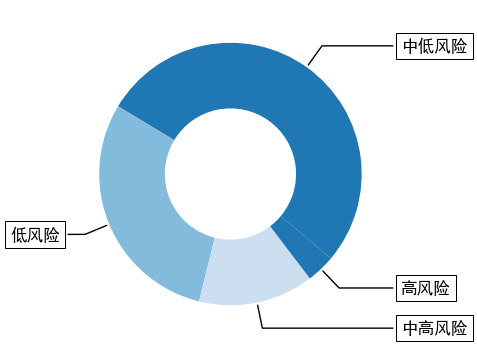

In [9]:
import pylab as plt
import numpy as np
plt.style.use('_mpl-gallery-nogrid')
plt.figure(figsize=(5, 5))
plt.rc('font', family = 'SimHei', size = 12)
plt.rc('axes', unicode_minus = False)
pie(data['糖尿病风险'].value_counts().values, ['中低风险', '低风险', '中高风险', '高风险'], explode=[1, 1, 1, 1])
plt.tight_layout()
plt.savefig('pie.png', dpi = 500)